In [1]:
%load_ext autotime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time: 2.16 s (started: 2024-09-17 17:10:57 -04:00)


In [2]:
from census import Census
from us import states
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path='key.env')


api_key = os.getenv('API_KEY')


c= Census(api_key)




time: 1.67 s (started: 2024-09-17 17:10:59 -04:00)


In [3]:
# https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2021.pdf

import requests
import json

# Define the URL for ACS 5-year variables
url = "https://api.census.gov/data/2020/acs/acs5/variables.json"

# Make the request
response = requests.get(url)
variables = response.json()

# Print the description for specific variables
variable_ids = [
    'B01001_001E', 'B01001B_001E', 'B01001H_001E',
    'B19001H_001E', 'B19001H_014E', 'B19001H_015E', 'B19001H_016E', 'B19001H_017E',
    'B19001B_001E', 'B19001B_002E', 'B19001B_003E', 'B19001B_004E', 'B19001B_005E',
    'C23002H_006E', 'C23002H_007E', 'C23002H_019E', 'C23002H_020E',
    'C23002B_006E', 'C23002B_007E', 'C23002B_019E', 'C23002B_020E',
    'C15002H_001E', 'C15002H_006E', 'C15002H_011E',
    'C15002B_001E', 'C15002B_006E', 'C15002B_011E',
    'B25003H_001E', 'B25003H_002E',
    'B25003B_001E', 'B25003B_002E'
]

# Print the descriptions of these variables
for var in variable_ids:
    description = variables['variables'].get(var, {}).get('label', 'No description available')
    print(f"Variable: {var}, Description: {description}")


Variable: B01001_001E, Description: Estimate!!Total:
Variable: B01001B_001E, Description: Estimate!!Total:
Variable: B01001H_001E, Description: Estimate!!Total:
Variable: B19001H_001E, Description: Estimate!!Total:
Variable: B19001H_014E, Description: Estimate!!Total:!!$100,000 to $124,999
Variable: B19001H_015E, Description: Estimate!!Total:!!$125,000 to $149,999
Variable: B19001H_016E, Description: Estimate!!Total:!!$150,000 to $199,999
Variable: B19001H_017E, Description: Estimate!!Total:!!$200,000 or more
Variable: B19001B_001E, Description: Estimate!!Total:
Variable: B19001B_002E, Description: Estimate!!Total:!!Less than $10,000
Variable: B19001B_003E, Description: Estimate!!Total:!!$10,000 to $14,999
Variable: B19001B_004E, Description: Estimate!!Total:!!$15,000 to $19,999
Variable: B19001B_005E, Description: Estimate!!Total:!!$20,000 to $24,999
Variable: C23002H_006E, Description: Estimate!!Total:!!Male:!!16 to 64 years:!!In labor force:!!Civilian:
Variable: C23002H_007E, Descri

In [4]:
dc_census = c.acs5.state_county_tract(fields = ('NAME',
                                                'B01001_001E', 'B01001B_001E', 'B01001H_001E', # population, black pop, white alone(not hispanic or latino)
                                               'B19001H_001E','B19001H_014E', 'B19001H_015E', 'B19001H_016E', 'B19001H_017E', # white income
                                                'B19001B_001E','B19001B_002E', 'B19001B_003E', 'B19001B_004E', 'B19001B_005E', # black income
                                               'C23002H_006E', 'C23002H_007E', 'C23002H_019E', 'C23002H_020E', # employment rates for White pop
                                               'C23002B_006E', 'C23002B_007E','C23002B_019E', 'C23002B_020E', # employment rates for balck pop 
                                               'C15002H_001E', 'C15002H_006E', 'C15002H_011E', # Education for the white pop
                                               'C15002B_001E', 'C15002B_006E', 'C15002B_011E', # education for the black pop
                                               'B25003H_001E', 'B25003H_002E', # homeownership for the white pop
                                               'B25003B_001E', 'B25003B_002E',
                                               ), # homeownership for the black pop
                                      state_fips = states.DC.fips,  #  Dist. of Columbia
                                      county_fips = "*",   # all counties in the state
                                      tract = "*",  # all the tracts in the counties and state
                                      year = 2009)  # 2009 ACS 5- year estimates
dc_df = pd.DataFrame(dc_census)
dc_df.head()

,NAME,B01001_001E,B01001B_001E,B01001H_001E,B19001H_001E,B19001H_014E,B19001H_015E,B19001H_016E,B19001H_017E,B19001B_001E,...,C15002B_001E,C15002B_006E,C15002B_011E,B25003H_001E,B25003H_002E,B25003B_001E,B25003B_002E,state,county,tract
0,"Census Tract 20.02, District of Columbia, Dist...",3967,2350.0,990.0,295.0,15.0,22.0,91.0,124.0,924.0,...,1833.0,229.0,291.0,295.0,268.0,924.0,560.0,11,001,002002
1,"Census Tract 21.01, District of Columbia, Dist...",5084,3310.0,401.0,186.0,22.0,35.0,76.0,0.0,1180.0,...,2281.0,88.0,200.0,186.0,151.0,1180.0,624.0,11,001,002101
2,"Census Tract 21.02, District of Columbia, Dist...",4482,3458.0,150.0,94.0,40.0,6.0,0.0,0.0,1595.0,...,2652.0,237.0,414.0,94.0,82.0,1595.0,971.0,11,001,002102
3,"Census Tract 22.01, District of Columbia, Dist...",3305,2517.0,195.0,108.0,0.0,0.0,52.0,0.0,859.0,...,1816.0,224.0,272.0,108.0,108.0,859.0,692.0,11,001,002201
4,"Census Tract 22.02, District of Columbia, Dist...",3222,2727.0,234.0,122.0,10.0,32.0,7.0,0.0,1080.0,...,1823.0,146.0,250.0,122.0,46.0,1080.0,432.0,11,001,002202


time: 5.72 s (started: 2024-09-17 17:11:02 -04:00)


In [5]:
dc_df = dc_df.rename(
    {'B01001_001E':'Total_Pop',
     'B01001B_001E':'Black_Pop',
     'B01001H_001E':'White_Pop',
     'B19001H_001E':'Total_household_income_white',
     'B19001H_014E':'Household_income_100_125',
     'B19001H_015E':'Household_income_125_150',
     'B19001H_016E':'Household_income_150_200',
     'B19001H_017E':'Household_income_200'
    },axis=1
)
dc_df.head()

,NAME,Total_Pop,Black_Pop,White_Pop,Total_household_income_white,Household_income_100_125,Household_income_125_150,Household_income_150_200,Household_income_200,B19001B_001E,...,C15002B_001E,C15002B_006E,C15002B_011E,B25003H_001E,B25003H_002E,B25003B_001E,B25003B_002E,state,county,tract
0,"Census Tract 20.02, District of Columbia, Dist...",3967,2350.0,990.0,295.0,15.0,22.0,91.0,124.0,924.0,...,1833.0,229.0,291.0,295.0,268.0,924.0,560.0,11,001,002002
1,"Census Tract 21.01, District of Columbia, Dist...",5084,3310.0,401.0,186.0,22.0,35.0,76.0,0.0,1180.0,...,2281.0,88.0,200.0,186.0,151.0,1180.0,624.0,11,001,002101
2,"Census Tract 21.02, District of Columbia, Dist...",4482,3458.0,150.0,94.0,40.0,6.0,0.0,0.0,1595.0,...,2652.0,237.0,414.0,94.0,82.0,1595.0,971.0,11,001,002102
3,"Census Tract 22.01, District of Columbia, Dist...",3305,2517.0,195.0,108.0,0.0,0.0,52.0,0.0,859.0,...,1816.0,224.0,272.0,108.0,108.0,859.0,692.0,11,001,002201
4,"Census Tract 22.02, District of Columbia, Dist...",3222,2727.0,234.0,122.0,10.0,32.0,7.0,0.0,1080.0,...,1823.0,146.0,250.0,122.0,46.0,1080.0,432.0,11,001,002202


time: 94 ms (started: 2024-09-17 17:11:07 -04:00)


In [6]:
dc_df['Total_Pop'] = pd.to_numeric(dc_df['Total_Pop'], errors='coerce')
dc_df['Black_Pop'] = pd.to_numeric(dc_df['Black_Pop'], errors='coerce')
dc_df['White_Pop'] = pd.to_numeric(dc_df['White_Pop'], errors='coerce')


dc_df['Others_Pop'] = (dc_df['Total_Pop']) - dc_df['Black_Pop'] - dc_df['White_Pop']


dc_df.head()


,NAME,Total_Pop,Black_Pop,White_Pop,Total_household_income_white,Household_income_100_125,Household_income_125_150,Household_income_150_200,Household_income_200,B19001B_001E,...,C15002B_006E,C15002B_011E,B25003H_001E,B25003H_002E,B25003B_001E,B25003B_002E,state,county,tract,Others_Pop
0,"Census Tract 20.02, District of Columbia, Dist...",3967,2350.0,990.0,295.0,15.0,22.0,91.0,124.0,924.0,...,229.0,291.0,295.0,268.0,924.0,560.0,11,001,002002,627.0
1,"Census Tract 21.01, District of Columbia, Dist...",5084,3310.0,401.0,186.0,22.0,35.0,76.0,0.0,1180.0,...,88.0,200.0,186.0,151.0,1180.0,624.0,11,001,002101,1373.0
2,"Census Tract 21.02, District of Columbia, Dist...",4482,3458.0,150.0,94.0,40.0,6.0,0.0,0.0,1595.0,...,237.0,414.0,94.0,82.0,1595.0,971.0,11,001,002102,874.0
3,"Census Tract 22.01, District of Columbia, Dist...",3305,2517.0,195.0,108.0,0.0,0.0,52.0,0.0,859.0,...,224.0,272.0,108.0,108.0,859.0,692.0,11,001,002201,593.0
4,"Census Tract 22.02, District of Columbia, Dist...",3222,2727.0,234.0,122.0,10.0,32.0,7.0,0.0,1080.0,...,146.0,250.0,122.0,46.0,1080.0,432.0,11,001,002202,261.0


time: 78 ms (started: 2024-09-17 17:11:07 -04:00)


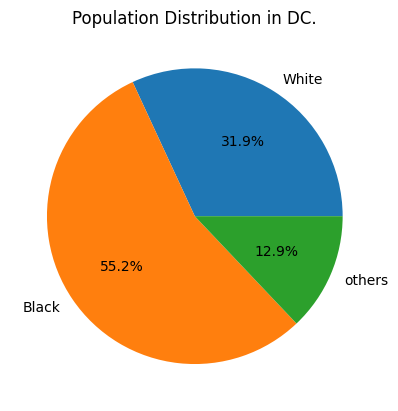

time: 235 ms (started: 2024-09-17 17:11:07 -04:00)


In [7]:
data = [dc_df['White_Pop'].sum(),
        dc_df['Black_Pop'].sum(),
        dc_df['Others_Pop'].sum()]
label = ['White','Black','others']
plt.pie(data,labels=label,autopct='%1.1f%%')
plt.title("Population Distribution in DC.")
plt.show()

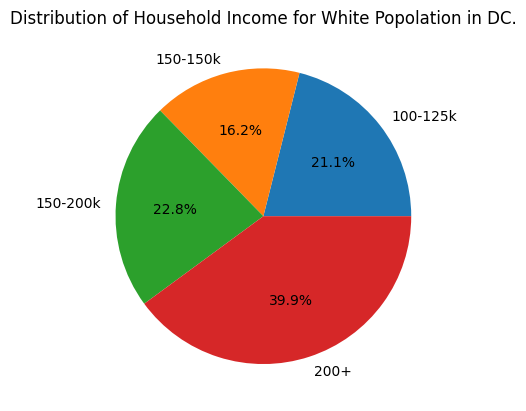

time: 235 ms (started: 2024-09-17 17:11:08 -04:00)


In [8]:
data = [dc_df['Household_income_100_125'].sum(),
        dc_df['Household_income_125_150'].sum(),
        dc_df['Household_income_150_200'].sum(),
        dc_df['Household_income_200'].sum()]
label = ['100-125k','150-150k','150-200k','200+']
plt.pie(data,labels=label,autopct='%1.1f%%')
plt.title("Distribution of Household Income for White Popolation in DC.")
plt.show()

In [9]:
column_order = ['Total_Pop', 'Black_Pop', 'White_Pop','Others_Pop',
                'Total_household_income_white', 'Household_income_100_125',
                'Household_income_125_150', 'Household_income_200']
data = dc_df[column_order]
data.head()

,Total_Pop,Black_Pop,White_Pop,Others_Pop,Total_household_income_white,Household_income_100_125,Household_income_125_150,Household_income_200
0,3967,2350.0,990.0,627.0,295.0,15.0,22.0,124.0
1,5084,3310.0,401.0,1373.0,186.0,22.0,35.0,0.0
2,4482,3458.0,150.0,874.0,94.0,40.0,6.0,0.0
3,3305,2517.0,195.0,593.0,108.0,0.0,0.0,0.0
4,3222,2727.0,234.0,261.0,122.0,10.0,32.0,0.0


time: 78 ms (started: 2024-09-17 17:11:08 -04:00)


In [10]:
data.to_csv('demo_dc.csv',index=False)

time: 16 ms (started: 2024-09-17 17:11:08 -04:00)
